# Аналитика для авиакомпании

Российской авиакомпании, выполняющей внутренние пассажирские перевозки, необходимо понять предпочтения пользователей, покупающих билеты на разные направления.

Задача: изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

## Ход работы и описание данных

**Шаг 1.  Аналитика средствами Python**

У нас есть файлы, в которых содержатся результаты запросов SQL.

**query_1.csv** — результат первого запроса. В нём содержится следующая информация:

- *model* — модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных необходимо:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

**Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».**

Поясним:

- как формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

**Шаг 3.  Общий вывод**

# 1. Аналитика

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [58]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')
tickets_festival = pd.read_csv('/datasets/query_last.csv')

In [59]:
display(model_flights.info())
model_flights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Датасет, как и заявлено, состоит из двух столбцов - `model` с данными типа *object* и `flights_amount` с данными *int64*. Пропусков нет, данные готовы к исследованию.

In [60]:
display(city_flights.info())
city_flights.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Таблица состоит из двух столбцов - `city` с данными типа *object* и `average_flights` с данными *float64*. Пропусков нет, но проверим датасет на дубликаты и аномальные значения.

In [61]:
city_flights.duplicated().value_counts()

False    101
dtype: int64

Дубликатов нет.

Text(0.5, 0, 'Cреднее количество рейсов/день')

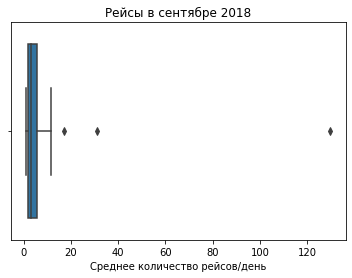

In [62]:
ax = sns.boxplot('average_flights', data=city_flights)
ax.set_title('Рейсы в сентябре 2018')
ax.set_xlabel('Cреднее количество рейсов/день')

Есть выбросы, но, возможно, это данные по самым крупным городам страны. Проверим.

In [63]:
city_flights.sort_values('average_flights', ascending=False).head()

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581


Действительно, как и ожидалось, самые большие значения по среднему числу прилетов в день принадлежат крупным городам.

Ознакомимся с последним датасетом.

In [64]:
display(tickets_festival.info())
tickets_festival.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


В глаза бросается очень много пропусков в столбце `festival_week` NaN-значения указывают на то, что в эту неделю фестиваля в Москве не было. Заменим их нетипичным значением -1. Заодно изменим тип данных на int.

Таким же образом поступим со столбцом `festival_name`, заменив пропуски нетипичным значением unk.

In [65]:
tickets_festival[['festival_week']] = tickets_festival[['festival_week']].fillna(value=-1).astype(int)

In [66]:
tickets_festival[['festival_name']] = tickets_festival[['festival_name']].fillna(value='unk')

In [67]:
tickets_festival.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,-1,unk
3,33,51378,-1,unk
4,34,51492,-1,unk


Визуализируем данные из первой таблицы - узнаем количество и долю выполняемых рейсов на разных джетах.

Text(0, 0.5, '')

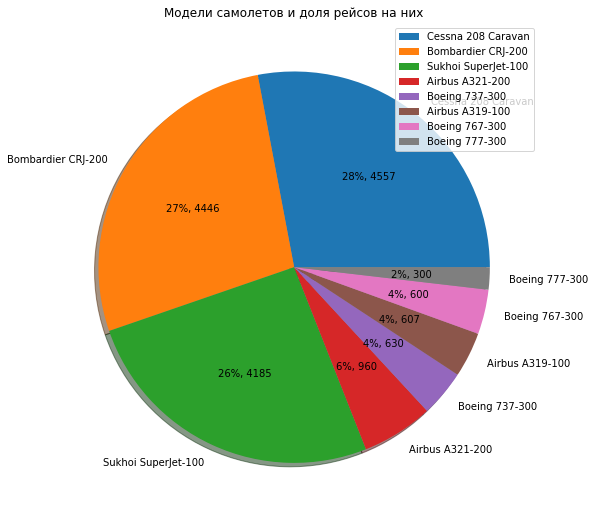

In [68]:
model_flights.set_index('model').sort_values('flights_amount', ascending=False).plot(y='flights_amount', kind='pie', figsize=(9, 9), autopct=lambda p:f'{p:.0f}%, {p*sum(model_flights.flights_amount)/100 :.0f}', shadow=True, title='Модели самолетов и доля рейсов на них')
ax = plt.gca()
ax.set_ylabel('')

По количеству выполняемых рейсов лидируют следующие модели: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100.

Построим диаграмму для всех городов, куда выполняются рейсы, и сравним их количество. Так как городов много, объединим все, где прибывающих рейсов в день меньше 5-и в отдельную группу - `other`.

In [69]:
city_flights['city_group'] = np.where(city_flights['average_flights']< 5, 'other', city_flights['city'])

In [70]:
city_flights.head()

,city,average_flights,city_group
0,Абакан,3.870968,other
1,Анадырь,1.000000,other
2,Анапа,2.161290,other
3,Архангельск,5.354839,Архангельск
4,Астрахань,2.451613,other


In [71]:
cities = city_flights.groupby(['city_group']).sum().sort_values('average_flights', ascending=False)

In [72]:
cities.head(5)

,average_flights
city_group,
other,172.945359
Москва,129.774194
Санкт-Петербург,31.161290
Новосибирск,17.322581
Красноярск,11.580645


Text(0, 0.5, 'Кол-во рейсов')

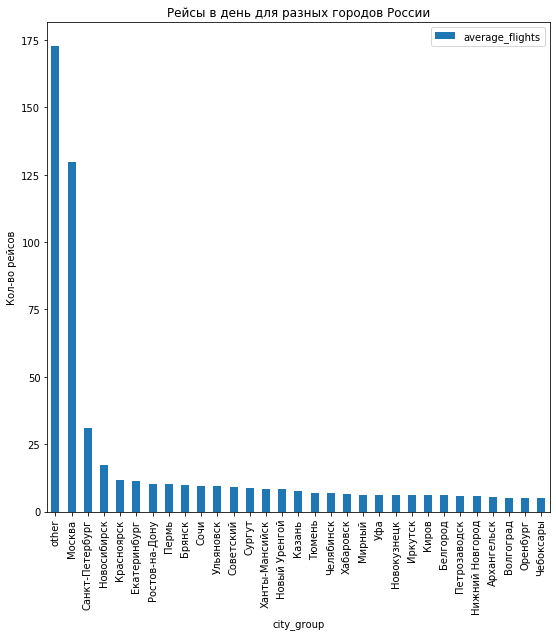

In [73]:
cities.plot(y='average_flights', kind='bar', figsize=(9, 9), title='Рейсы в день для разных городов России')
ax = plt.gca()
ax.set_ylabel('Кол-во рейсов')

Города Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург лидируют по количеству прибывающих в них рейсов авиакомпании.

Выберем топ-10 городов по количеству рейсов и построим для них диаграмму.

In [74]:
top_10 = (city_flights
          .sort_values('average_flights', ascending=False)
          .set_index('city')
          .head(10)
         )

In [75]:
top_10

,average_flights,city_group
city,,
Москва,129.774194,Москва
Санкт-Петербург,31.161290,Санкт-Петербург
Новосибирск,17.322581,Новосибирск
Красноярск,11.580645,Красноярск
Екатеринбург,11.322581,Екатеринбург
Ростов-на-Дону,10.193548,Ростов-на-Дону
Пермь,10.129032,Пермь
Брянск,10.000000,Брянск
Сочи,9.612903,Сочи


Text(0, 0.5, '%, кол-во рейсов')

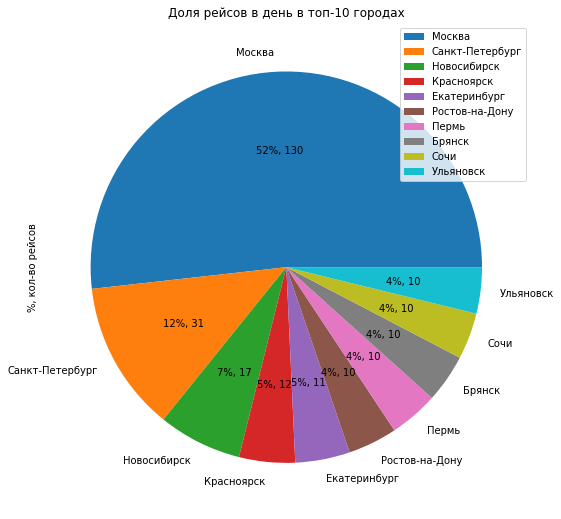

In [76]:
top_10.plot(y='average_flights', kind='pie', figsize=(9, 9), autopct=lambda p:f'{p:.0f}%, {p*sum(top_10.average_flights)/100 :.0f}', title='Доля рейсов в день в топ-10 городах')
ax = plt.gca()
ax.set_ylabel('%, кол-во рейсов')

В топ-10 городов Москва - абсолютный лидер по количеству прибывающих рейсов. Среди 10 городов-лидеров сюда прилетает больше половины всех самолетов.

Подготовим данные для проверки гипотезы. Создадим два новых датафрейма - с данными о проданных билетах во время фестиваля + в обычное время.

In [77]:
fest_weeks = tickets_festival[['festival_week', 'ticket_amount']].copy().query('festival_week != -1')
fest_weeks

,festival_week,ticket_amount
0,30,43568
1,31,51034
6,36,51386


In [78]:
non_fest_weeks = tickets_festival[['festival_week', 'ticket_amount']].copy().query('festival_week == -1')
non_fest_weeks

,festival_week,ticket_amount
2,-1,51675
3,-1,51378
4,-1,51492
5,-1,51360
7,-1,51670
8,-1,51518
9,-1,51623


Данные подготовлены.

**Выводы:**
 - По количеству выполняемых рейсов лидируют следующие модели: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100.
 - Города Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург лидируют по количеству прибывающих в них рейсов авиакомпании.
 - В топ-10 городов Москва - абсолютный лидер по количеству прибывающих рейсов. Среди 10 городов-лидеров сюда прилетает больше половины всех самолетов. В общем-то, неудивительно - столица.

# 2. Проверка гипотезы

Гипотеза звучит так - **Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.**

Сформулируем нулевую и альтернативную гипотезы. 

*Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.*

- H₀ - средний спрос на билеты во время фестивалей и обычное время одинаков
- H₁ - средний спрос на билеты во время фестивалей и обычное время различается

Перед проверкой гипотезы было бы неплохо проверить данные также на нормальность распределения, однако данных очень мало, поэтому сравним стандартное отклонение у двух выборок и перейдем к проверке.

In [97]:
print('Std по проданным билетам в датасете fest_weeks:', np.std(fest_weeks['ticket_amount']).round(2))

Std по проданным билетам в датасете fest_weeks: 3605.34


In [98]:
print('Std по проданным билетам в датасете non_fest_weeks:', np.std(non_fest_weeks['ticket_amount']).round(2))

Std по проданным билетам в датасете non_fest_weeks: 121.22


Так как стандартные отклонения различаются значительно, то лучшим вариантом будет провести тест с отрицательным значением параметра **equal_var**.

Для проверки нулевой гипотезы используем t-критерий Стьюдента, так как мы проверяем равенство средних значений двух независимых совокупностей (вычисляем среднее количество проданных билетов за период времени, когда фестивали не проходили, и сравниваем со средним количеством проданных билетов во время проведения фестивалей).

In [79]:
#зададим критический уровень статистической значимости *alpha* равный 0.01
alpha = 0.01

In [80]:
results = st.ttest_ind(
    fest_weeks['ticket_amount'],
    non_fest_weeks['ticket_amount'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Среднее кол-во проданных билетов во время проведения фестивалей', fest_weeks['ticket_amount'].mean().round(2))
print('Среднее кол-во проданных билетов в обычное время', non_fest_weeks['ticket_amount'].mean().round(2))

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу

Среднее кол-во проданных билетов во время проведения фестивалей 48662.67
Среднее кол-во проданных билетов в обычное время 51530.86


**Выводы:**

- нулевую гипотезу отвергнуть не удалось, это значит, что мы с вероятностью ошибки 1% можем утверждать, что **средний спрос на билеты во время фестивалей и обычное время одинаков**.

# 3. Общий вывод

В ходе работы подготовили и проанализировали полученные данные и выяснили, что:
- большинство рейсов авиакомпании выполняется на следующих моделях джетов : `Bombardier CRJ-200`, `Cessna 208 Caravan`, `Sukhoi SuperJet-100`;
- города *Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург* лидируют по количеству рейсов авиакомпании, при этом в Москву выполняется больше поливины рейсов среди топ-10 городов;
- **средний спрос на билеты авиакомпании во время проведения фестивалей и обычное время одинаков** (с вероятностью ошибки 1%).